In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 读取数据
df = pd.read_csv('./data/test_data.csv')

df

,0,1,2,6,11,14,16,20,27,29,...,2327,2551,2653,2813,2817,2825,2842,3141,3287,3299
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.561735,0.000000,1.589067,1.589067,0.000000,0.000000
2,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.589067,1.589067,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.418986,0.000000,1.262567,1.262567,0.000000,0.000000
3,0.000000,1.589067,0.000000,0.000000,0.000000,2.000000,0.000000,1.262567,3.262567,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.511033,0.000000,1.003152,1.003152,0.000000,0.000000
4,0.000000,1.262567,0.000000,0.000000,0.000000,1.589067,0.000000,1.003152,2.592219,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.789633,0.000000,0.797038,0.797038,0.000000,0.000000
5,0.000000,1.003152,0.000000,1.000000,0.000000,7.262568,6.000000,8.797038,2.059605,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.216457,0.000000,0.633274,0.633274,0.000000,0.000000
6,0.000000,0.797038,0.000000,0.794534,0.000000,5.770353,4.767201,6.989542,1.636426,0.000000,...,0.000000,0.000000,0.000000,4.000000,1.761050,0.000000,0.503157,0.503157,0.000000,0.000000
7,0.000000,0.633274,15.000000,2.631284,0.000000,4.584740,11.787703,5.553427,1.300195,2.000000,...,0.000000,0.000000,2.000000,3.178134,1.399213,1.000000,0.399775,0.399775,0.000000,0.000000
8,0.000000,0.503157,11.918005,2.090643,0.000000,3.642730,9.365725,4.412384,1.033049,1.589067,...,0.000000,0.000000,1.589067,2.525135,1.111722,0.794534,0.317635,0.317635,0.000000,0.000000
9,0.000000,0.399775,9.469255,1.661086,0.000000,2.894271,7.441384,3.505787,0.820792,1.262567,...,0.000000,0.000000,1.262567,2.006304,0.883300,0.631284,0.252372,0.252372,0.000000,0.000000


In [3]:
# 提取用户的商品类目集合
item_u = list(df.columns)

item_u

['0',
 '1',
 '2',
 '6',
 '11',
 '14',
 '16',
 '20',
 '27',
 '29',
 '30',
 '32',
 '35',
 '36',
 '37',
 '38',
 '42',
 '47',
 '49',
 '55',
 '57',
 '61',
 '64',
 '73',
 '75',
 '79',
 '83',
 '85',
 '87',
 '99',
 '100',
 '108',
 '117',
 '125',
 '128',
 '132',
 '137',
 '148',
 '158',
 '164',
 '165',
 '183',
 '192',
 '205',
 '206',
 '209',
 '212',
 '217',
 '220',
 '224',
 '225',
 '226',
 '228',
 '234',
 '238',
 '257',
 '280',
 '281',
 '341',
 '383',
 '391',
 '430',
 '450',
 '451',
 '475',
 '493',
 '495',
 '504',
 '506',
 '534',
 '539',
 '549',
 '594',
 '609',
 '617',
 '618',
 '622',
 '702',
 '708',
 '725',
 '736',
 '799',
 '804',
 '837',
 '843',
 '863',
 '895',
 '902',
 '924',
 '927',
 '945',
 '973',
 '983',
 '992',
 '1026',
 '1099',
 '1168',
 '1195',
 '1209',
 '1220',
 '1233',
 '1280',
 '1285',
 '1302',
 '1303',
 '1317',
 '1419',
 '1582',
 '1629',
 '1677',
 '1734',
 '1814',
 '2002',
 '2083',
 '2117',
 '2140',
 '2197',
 '2297',
 '2327',
 '2551',
 '2653',
 '2813',
 '2817',
 '2825',
 '2842',
 '3

In [4]:
N = 13

In [5]:
# 用户在最后一天进行交互的商品类目
last_interact = [1, 12, 16, 27, 30, 37, 49, 75, 85, 117, 140, 164, 285, 316, 495, 803, 1323]

last_interact

[1, 12, 16, 27, 30, 37, 49, 75, 85, 117, 140, 164, 285, 316, 495, 803, 1323]

In [6]:
# 定义模型
import torch
from torch import nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__() # 调用父类nn.Module中的init方法
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, h0=None):
        # 输入x的形状为（batch_size，seq_len，input_size）
        batch_size, seq_len, input_size = x.shape

        # h0默认为全0，否则取h0输入模型的值

        # 输入rnn的形状为（1，seq_len，input_size）
        # 输出rnn的形状为（1，seq_len，hidden_size）
        out, _ = self.rnn(x, h0)
        # 输入fc的形状为（1，1，hidden_size）（只取最后一个时间步）
        # 输出fc的形状为（1，1，output_size）
        out = self.fc(out[:,-1,:])
        return out

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRU, self).__init__() # 调用父类nn.Module中的init方法
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, h0=None):
        # 输入x的形状为（batch_size，seq_len，input_size）
        batch_size, seq_len, input_size = x.shape

        # h0默认为全0，否则取h0输入模型的值

        # 输入rnn的形状为（1，seq_len，input_size）
        # 输出rnn的形状为（1，seq_len，hidden_size）
        out, _ = self.gru(x, h0)
        # 输入fc的形状为（1，1，hidden_size）（只取最后一个时间步）
        # 输出fc的形状为（1，1，output_size）
        out = self.fc(out[:,-1,:])
        return out

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTM, self).__init__() # 调用父类nn.Module中的init方法
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True) # LSTM考虑计算复杂度只使用1层
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, h0=None):
        # 输入x的形状为（batch_size，seq_len，input_size）
        batch_size, seq_len, input_size = x.shape

        # h0默认为全0，否则取h0输入模型的值

        # 输入rnn的形状为（1，seq_len，input_size）
        # 输出rnn的形状为（1，seq_len，hidden_size）
        out, _ = self.lstm(x, h0)
        # 输入fc的形状为（1，1，hidden_size）（只取最后一个时间步）
        # 输出fc的形状为（1，1，output_size）
        out = self.fc(out[:,-1,:])
        return out

In [9]:
# 定义超参数
class Para():
    input_size = 1
    hidden_size = 64
    output_size = 1
    num_layers = 2
    lr = 0.001
    epochs = 50

para = Para()

In [10]:
# 数据处理
seq, cat = df.shape
para.input_size = cat
para.output_size = cat

# 转换为numpy数组
input = df.to_numpy()

# 数据归一化
scaler = MinMaxScaler()
input = scaler.fit_transform(input)

# reshape数组
input = input.reshape(1, seq, cat)

input.shape

(1, 31, 128)

In [11]:
# pd.DataFrame(input.reshape(seq, cat))

In [13]:
# 声明模型
model1 = RNN(para.input_size, para.hidden_size, para.output_size, para.num_layers)
model2 = LSTM(para.input_size, para.hidden_size, para.output_size, para.num_layers)
model3 = GRU(para.input_size, para.hidden_size, para.output_size, para.num_layers)
criterion = nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), para.lr)
optimizer2 = torch.optim.Adam(model2.parameters(), para.lr)
optimizer3 = torch.optim.Adam(model3.parameters(), para.lr)

In [14]:
# 划分数据集
# 训练前20天，测试后11天
train = input[:, :20, :]
train_x = train[:, :-1, :]
train_y = train[:, -1:, :]
test = input[:, 20:, :]
test_x = test[:, :-1, :]
test_y = test[:, -1, :]

# 将训练集及测试集转换为tensor
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)
test_y = test_y.reshape(1, 1, cat)

print(f'{train_x.shape}\n{train_y.shape}\n{test_x.shape}\n{test_y.shape}')

torch.Size([1, 19, 128])
torch.Size([1, 1, 128])
torch.Size([1, 10, 128])
torch.Size([1, 1, 128])


In [15]:
# 训练模型
for epoch in range(para.epochs):
    optimizer1.zero_grad() # 优化器梯度清零
    output = model1(train_x) # model的output会是一个形状为（1，1，output_size）的一维向量
    output = output.reshape(1, 1, para.output_size)
    loss = criterion(output, train_y) # 计算预测输出与实际输出的loss
    loss.backward() # 计算梯度
    optimizer1.step() # 更新参数
    print(f'epoch: [{epoch} in {para.epochs}] | loss: [{loss}]')

for epoch in range(para.epochs):
    optimizer2.zero_grad() # 优化器梯度清零
    output = model2(train_x) # model的output会是一个形状为（1，1，output_size）的一维向量
    output = output.reshape(1, 1, para.output_size)
    loss = criterion(output, train_y) # 计算预测输出与实际输出的loss
    loss.backward() # 计算梯度
    optimizer2.step() # 更新参数
    print(f'epoch: [{epoch} in {para.epochs}] | loss: [{loss}]')

for epoch in range(para.epochs):
    optimizer3.zero_grad() # 优化器梯度清零
    output = model3(train_x) # model的output会是一个形状为（1，1，output_size）的一维向量
    output = output.reshape(1, 1, para.output_size)
    loss = criterion(output, train_y) # 计算预测输出与实际输出的loss
    loss.backward() # 计算梯度
    optimizer3.step() # 更新参数
    print(f'epoch: [{epoch} in {para.epochs}] | loss: [{loss}]')


epoch: [0 in 50] | loss: [0.11234673857688904]
epoch: [1 in 50] | loss: [0.08954594284296036]
epoch: [2 in 50] | loss: [0.07611917704343796]
epoch: [3 in 50] | loss: [0.06739073991775513]
epoch: [4 in 50] | loss: [0.06038490682840347]
epoch: [5 in 50] | loss: [0.05386391282081604]
epoch: [6 in 50] | loss: [0.04761962592601776]
epoch: [7 in 50] | loss: [0.0417880080640316]
epoch: [8 in 50] | loss: [0.036444276571273804]
epoch: [9 in 50] | loss: [0.03148229792714119]
epoch: [10 in 50] | loss: [0.026786454021930695]
epoch: [11 in 50] | loss: [0.022385790944099426]
epoch: [12 in 50] | loss: [0.018396969884634018]
epoch: [13 in 50] | loss: [0.014911643229424953]
epoch: [14 in 50] | loss: [0.011953967623412609]
epoch: [15 in 50] | loss: [0.009507683105766773]
epoch: [16 in 50] | loss: [0.007528906222432852]
epoch: [17 in 50] | loss: [0.005946011282503605]
epoch: [18 in 50] | loss: [0.004689705558121204]
epoch: [19 in 50] | loss: [0.0037326891906559467]
epoch: [20 in 50] | loss: [0.0030635800

In [125]:
# 验证模型
with torch.no_grad():
    output1 = model1(test_x)
    output1 = output1.reshape(1, 1, cat)
    output2 = model2(test_x)
    output2 = output2.reshape(1, 1, cat)
    output3 = model3(test_x)
    output3 = output3.reshape(1, 1, cat)
    loss = criterion(output, test_y)

print(f'loss: [{loss}]')

loss: [0.11365297436714172]


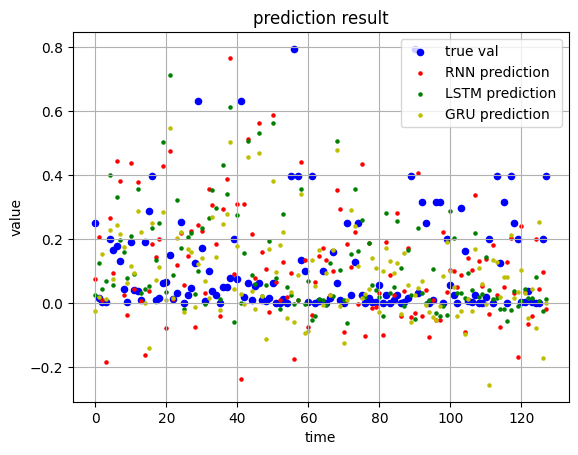

In [18]:
# 模型loss可视化
import matplotlib.pyplot as plt

# 读取数据
with torch.no_grad():
    model_output1 = model1(test_x)
    model_output2 = model2(test_x)
    model_output3 = model3(test_x)
true_val = np.array(test_y.reshape(cat))
RNN_val = np.array(model_output1.reshape(cat))
LSTM_val = np.array(model_output2.reshape(cat))
GRU_val = np.array(model_output3.reshape(cat))

# 创建索引数组
indices = np.arange(cat)

plt.scatter(indices, true_val, color='b', label='true val', s=20)
plt.scatter(indices, RNN_val, color='r', label='RNN prediction', s=5)
plt.scatter(indices, LSTM_val, color='g', label='LSTM prediction', s=5)
plt.scatter(indices, GRU_val, color='y', label='GRU prediction', s=5)

plt.xlabel('time')
plt.ylabel('value')
plt.title('prediction result')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
output

tensor([[[ 0.4029,  0.7707, -0.0411,  0.2223,  0.1700,  0.0630,  0.4854,
           0.7559,  0.0758,  0.0187,  0.4411,  0.6124,  0.1341,  0.0904,
          -0.1495,  0.3649,  0.3505,  0.4579,  0.9109,  0.3875,  0.4909,
           0.5946,  0.1086,  0.6814,  0.2611,  0.6224,  0.3602,  0.0556,
           0.4888,  0.2465,  0.1189,  0.7395,  0.3567,  0.0710,  0.4823,
          -0.0271,  0.0817,  0.0694,  0.2630,  0.6874, -0.0903,  0.2469,
           0.3329,  0.6168,  0.1931,  0.2683,  0.0474,  0.6603,  0.0515,
           0.4944,  0.2436, -0.0231,  0.0231,  0.8238,  0.0387,  0.4437,
           0.5181,  0.0402,  0.1028,  0.4237,  0.2729,  0.5997,  0.2939,
           0.0918,  0.7325,  0.0701,  0.2870,  0.0153, -0.0443,  0.1974,
           0.3211,  0.0974,  0.2080,  0.7551,  0.4836, -0.1420,  0.3105,
           0.2493,  0.0738, -0.0093,  0.0041,  0.5343,  0.1197,  0.3381,
          -0.0875,  0.5559, -0.0584,  0.2926,  0.2332,  0.6653,  0.4779,
           0.0192,  0.3015,  0.0163,  0.0898,  0.37

In [128]:
N

13

In [129]:
# 计算，初始阈值为0.6，每次步长为0.05
output_np = np.array(output)
output_np = output_np.reshape(len(item_u))
threshold = 0.6
step = 0.05
while True:
    count = len(item_u)
    for i in range(len(output_np)):
        if output_np[i] < threshold:
            output_np[i] = -1
            count -= 1
    
    if count <= N:
        break;
    else:
        threshold += step

output_np

array([-1.        ,  0.77069896, -1.        , -1.        , -1.        ,
       -1.        , -1.        ,  0.7559321 , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        ,  0.91091824, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  0.73952574, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        ,  0.8237729 , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  0.73249763,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [130]:
last_interact

[1, 12, 16, 27, 30, 37, 49, 75, 85, 117, 140, 164, 285, 316, 495, 803, 1323]

In [131]:
# 定义真假正负例记录数组
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(item_u)): 
    if output_np[i] > 0: # 正例
        if int(item_u[i]) in last_interact: # 真正例
            TP += 1
        else: # 假正例
            FP += 1
    else: # 负例
        if int(item_u[i]) in last_interact: # 假负例
            FN += 1
        else: # 真负例
            TN += 1
            

print(f'TP [{TP}]\nFP [{FP}]\nTN [{TN}]\nFN [{FN}]')

TP [2]
FP [8]
TN [114]
FN [11]


In [132]:
# 计算各类标签
P = TP + FP
N = TN + FN

accuracy = round((TP + TN) * 100 / (P + N), 2)
precision = round(TP * 100 / P, 2)
recall = round(TP * 100 / (TP + FN), 2)
specificity = round(TN * 100 / (TN + FP), 2)
f1 = round((2 * precision * recall / 100) / (precision + recall), 2)

print(f'Accuracy [{accuracy}%]\nPrecision [{precision}%]\nRecall [{recall}%]\nSpecificity [{specificity}%]\nF1 Score [{f1}]')

Accuracy [85.93%]
Precision [20.0%]
Recall [15.38%]
Specificity [93.44%]
F1 Score [0.17]
